**Handling and Removing Outliers**

**Definition:**

• Outliers: Outliers are data points that differ significantly from other observations. They can occur due to variability in the data or experimental errors.

• Handling Outliers: This involves identifying and deciding whether to remove or adjust outliers to improve the accuracy of statistical analyses and machine learning models.

**Use Case in Real Life:**

• Financial Data Analysis: Identify and remove outliers in financial transaction data to prevent fraudulent activities and improve the accuracy of financial models.

• Customer Data Management: Clean customer data by handling outliers in age, income, and spending to create accurate customer segments and improve marketing strategies.

• Health Data Analysis: Detect and handle outliers in patient health records, such as blood pressure and cholesterol levels, to ensure accurate diagnosis and treatment plans.

In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv('outliers_data.csv')
print(df)

      Name  Age   Salary   Department
0    Alice   25    50000           HR
1      Bob   30  1200000  Engineering
2  Charlie   35    70000  Engineering
3    David   50    60000           HR
4      Eve   28    80000           HR
5    Frank   40    55000        Sales
6    Grace   50    85000        Sales
7     Hank   60    90000        Sales
8      Ivy   32  1500000  Engineering
9     Jack   45    62000  Engineering


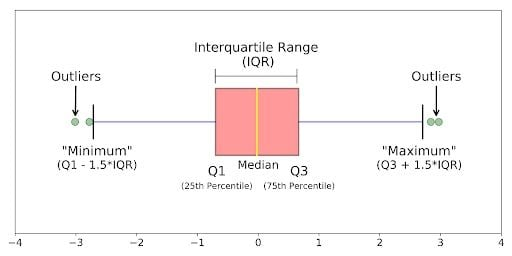

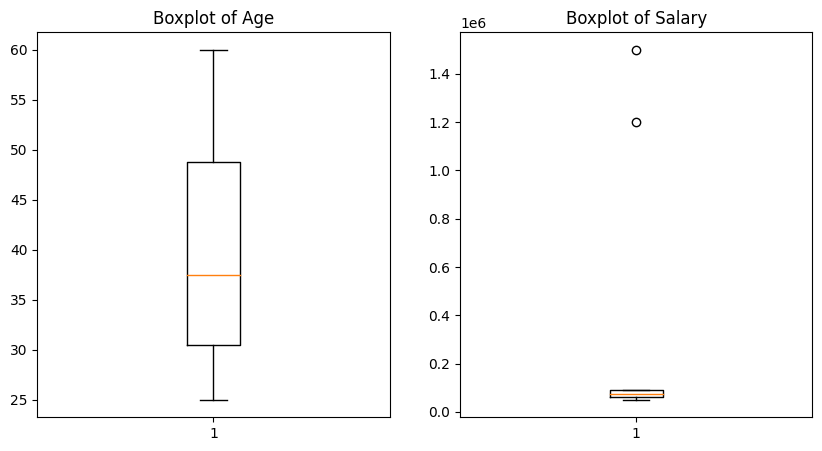

In [4]:
#Visualizing Outliers using Boxplots

import matplotlib.pyplot as plt
#Boxplot to visualize outliers in the Age column
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['Age'].dropna())
plt.title('Boxplot of Age')
# Boxplot to visualize outliers in the Salary column
plt.subplot(1, 2, 2)
plt.boxplot(df['Salary'].dropna())
plt.title('Boxplot of Salary')
plt.show()


Handling Outliers - Capping Outliers

In [5]:
# Capping the outliers using IQR method
df_capped = df.copy()
for column in ['Age', 'Salary']:
    Q1 = df_capped[column].quantile(0.25)
    Q3 = df_capped[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped[column] = df_capped [column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
print('Data after capping outliers using IQR method:')
print(df_capped)

Data after capping outliers using IQR method:
      Name  Age    Salary   Department
0    Alice   25   50000.0           HR
1      Bob   30  131125.0  Engineering
2  Charlie   35   70000.0  Engineering
3    David   50   60000.0           HR
4      Eve   28   80000.0           HR
5    Frank   40   55000.0        Sales
6    Grace   50   85000.0        Sales
7     Hank   60   90000.0        Sales
8      Ivy   32  131125.0  Engineering
9     Jack   45   62000.0  Engineering


Handling Outliers - Replacing Outliers with Mean/Median

In [7]:
# Replacing the outlierss with median values
df_replaced = df.copy()
for column in ['Age', 'Salary']:
    Q1 = df_replaced[column].quantile(0.25)
    Q3 = df_replaced[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df_replaced[column].median()
    df_replaced[column] = df_replaced [column].apply(lambda x: median if x > upper_bound or x < lower_bound else x)
print('Data after replacing outliers with median values:')
print(df_replaced)

Data after replacing outliers with median values:
      Name  Age   Salary   Department
0    Alice   25  50000.0           HR
1      Bob   30  75000.0  Engineering
2  Charlie   35  70000.0  Engineering
3    David   50  60000.0           HR
4      Eve   28  80000.0           HR
5    Frank   40  55000.0        Sales
6    Grace   50  85000.0        Sales
7     Hank   60  90000.0        Sales
8      Ivy   32  75000.0  Engineering
9     Jack   45  62000.0  Engineering
